<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/Heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection  import train_test_split
import sklearn
import seaborn as sns
import numpy as np

In [77]:
np.random.seed(0)

In [78]:
df = pd.read_csv('/content/heart.csv')
X = df.drop(['sex', 'oldpeak'], axis=1)  # test data
y = df.sex

In [79]:
X = pd.get_dummies(X)
X.head()

,age,cp,trtbps,chol,fbs,restecg,thalachh,exng,slp,caa,thall,output
0,63,3,145,233,1,0,150,0,0,0,1,1
1,37,2,130,250,0,1,187,0,0,0,2,1
2,41,1,130,204,0,0,172,0,2,0,2,1
3,56,1,120,236,0,1,178,0,2,0,2,1
4,57,0,120,354,0,1,163,1,2,0,2,1


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

<Axes: xlabel='thalachh', ylabel='age'>

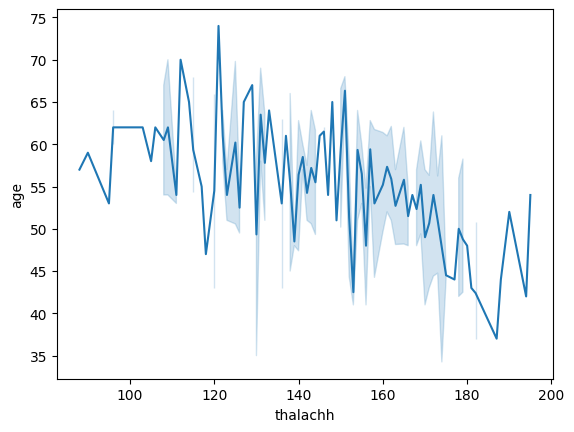

In [81]:
sns.lineplot(x='thalachh', y='age', data=X_train)

In [82]:
len(X_train)

203

In [83]:
len(y_train)

203

In [86]:
res = {}
for i in range(1, 100 + 1):
  clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
  clf.fit(X_train, y_train)
  res[clf.score(X_test, y_test)] = i

In [88]:
res[max(res)]

6

In [89]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.76

In [94]:
def draw_graphviz(graph):
    import re
    import ipywidgets as widgets
    from IPython.display import SVG, HTML
    from graphviz import Source

    graph = Source(graph)
    image = graph.pipe(format="svg")
    svg = SVG(image)
    svg_data = svg.data
    svg_data = re.sub(
        r'<svg xmlns=\"http://www\.w3\.org/2000/svg\" xmlns:xlink=\"http://www\.w3\.org/1999/xlink\" width=\"\d+pt\" height=\"\d+pt\"',
        '<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" width="100%" height="100%"',
        svg_data,
    )

    @widgets.interact(scale=widgets.IntSlider(min=30, max=500, step=1, value=100, description="Scale (%):", continuous_update=False))
    def _draw_svg(scale):
        return HTML('<div style="width: {width}%;">{svg}</div>'.format(width=scale, svg=svg_data))
    return _draw_svg

In [95]:
graph = tree.export_graphviz(clf, out_file=None, feature_names=list(X), class_names=["M", "F"], filled=True)
draw_graphviz(graph)

interactive(children=(IntSlider(value=100, continuous_update=False, description='Scale (%):', max=500, min=30)…

<function __main__.draw_graphviz.<locals>._draw_svg(scale)>